# Data Exploration

Perform Data Exploration on the Consolidated Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [2]:
path_df = "./Pickles/all_articles_raw.pickle"

with open(path_df, 'rb') as data:
    articles = pickle.load(data)

## News Source

In [3]:
articles.head()

,source,title,article,category
0,The Straits Times,Body found in garbage chute area of Woodlands ...,SINGAPORE - A man's body was found on the grou...,Singapore
1,The Straits Times,Formula One: Thai Alexander Albon given chance...,London (AFP) - Thai Formula One driver Alexand...,Sports
2,The Straits Times,The Straits Times bags 8 wins at Asian Digital...,SINGAPORE - The Straits Times bagged eight awa...,Singapore
3,The Straits Times,Games,Ready for a challenge? Try out daily Sudoku an...,Lifestyle
4,The Straits Times,Hong Kong cancels all remaining Monday flights...,HONG KONG (BLOOMBERG) – Hong Kong airport auth...,World


In [4]:
len(articles)

6717

Text(0.5, 1.0, 'News Source')

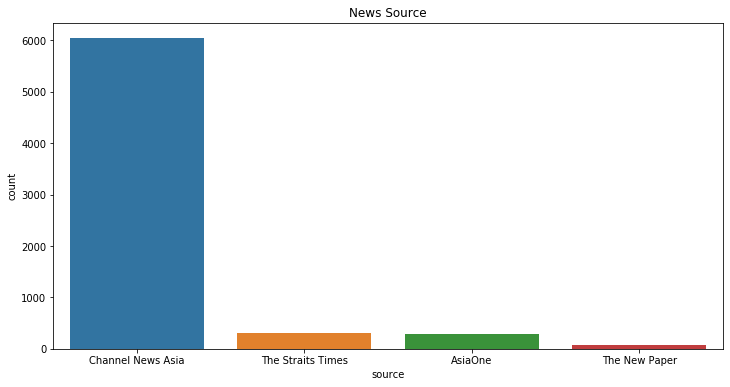

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x='source',data=articles,order=articles['source'].value_counts().iloc[:10].index,).set_title("News Source")

In [6]:
articles['source'].value_counts()

Channel News Asia    6042
The Straits Times     308
AsiaOne               284
The New Paper          83
Name: source, dtype: int64

## Article Categories

Text(0.5, 1.0, 'Categories')

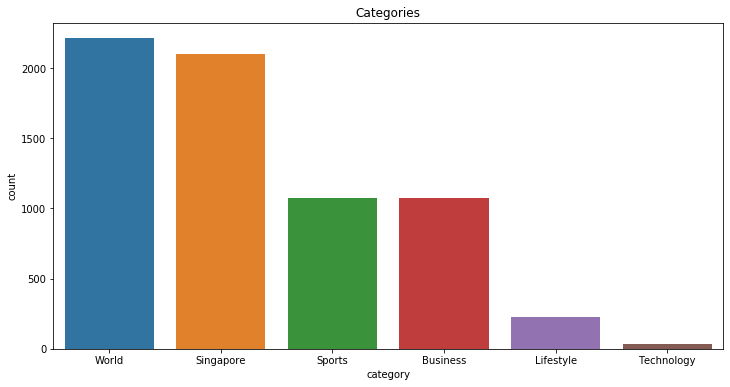

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='category',data=articles,order=articles['category'].value_counts().iloc[:10].index,).set_title("Categories")

In [8]:
articles['category'].value_counts()

World         2212
Singapore     2098
Sports        1075
Business      1071
Lifestyle      225
Technology      36
Name: category, dtype: int64

## Article Length

In [9]:
articles['length_characters'] = articles['article'].apply(len)
articles['length_words']=articles['article'].str.split().str.len()
articles.head()

,source,title,article,category,length_characters,length_words
0,The Straits Times,Body found in garbage chute area of Woodlands ...,SINGAPORE - A man's body was found on the grou...,Singapore,581,101
1,The Straits Times,Formula One: Thai Alexander Albon given chance...,London (AFP) - Thai Formula One driver Alexand...,Sports,1208,219
2,The Straits Times,The Straits Times bags 8 wins at Asian Digital...,SINGAPORE - The Straits Times bagged eight awa...,Singapore,4026,654
3,The Straits Times,Games,Ready for a challenge? Try out daily Sudoku an...,Lifestyle,400,77
4,The Straits Times,Hong Kong cancels all remaining Monday flights...,HONG KONG (BLOOMBERG) – Hong Kong airport auth...,World,7814,1228


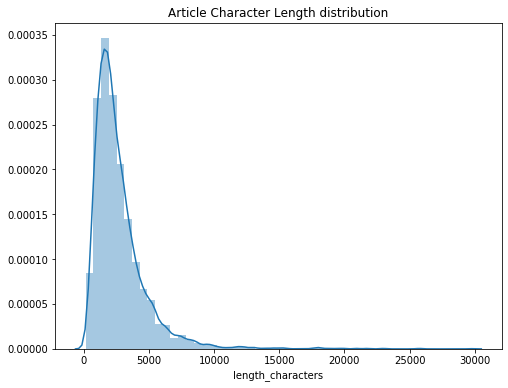

In [10]:
plt.figure(figsize=(8,6))
sns.distplot(articles['length_characters']).set_title('Article Character Length distribution');

In [11]:
articles['length_characters'].describe()

count     6717.000000
mean      2733.967545
std       2149.934224
min        147.000000
25%       1431.000000
50%       2185.000000
75%       3367.000000
max      29720.000000
Name: length_characters, dtype: float64

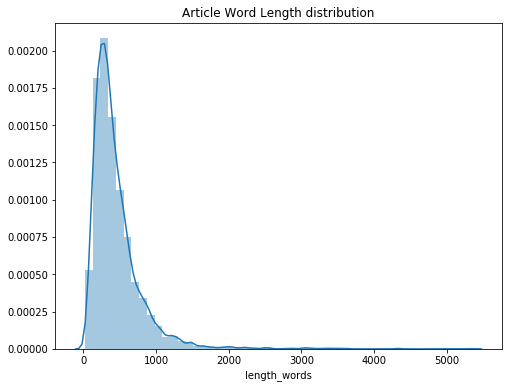

In [12]:
plt.figure(figsize=(8,6))
sns.distplot(articles['length_words']).set_title('Article Word Length distribution');

In [13]:
articles['length_words'].describe()

count    6717.000000
mean      448.734405
std       357.574246
min        21.000000
25%       235.000000
50%       357.000000
75%       553.000000
max      5350.000000
Name: length_words, dtype: float64

### Longest Article

In [14]:
articles[articles['length_words']==5350]

,source,title,article,category,length_characters,length_words
338,The Straits Times,Multiple women say opera star Placido Domingo ...,"\nNEW YORK (AP) - For decades, Placido Domingo...",Lifestyle,29720,5350


### Shortest Article

In [15]:
liverpool = articles[articles['length_words']==21]

In [16]:
liverpool['article']

4473    LONDON: Liverpool have completed the signing o...
Name: article, dtype: object

### Article Length by Category

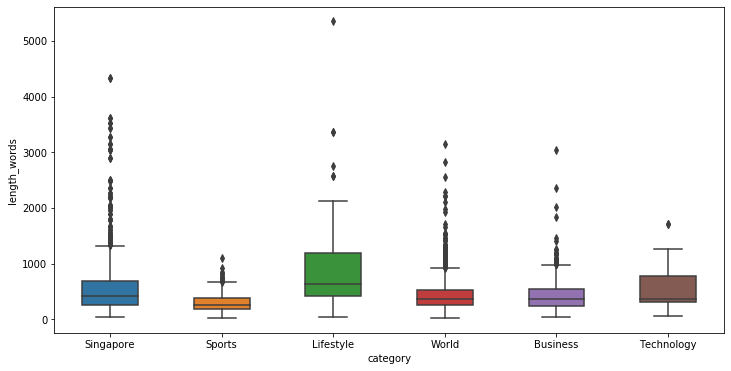

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=articles, x='category', y='length_words', width=.5);

In [18]:
articles.groupby('category')['length_words'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Business,1071.0,411.882353,261.883789,39.0,235.50,360.0,534.0,3040.0
Lifestyle,225.0,854.506667,647.982839,39.0,418.00,638.0,1191.0,5350.0
Singapore,2098.0,534.345567,449.248883,39.0,250.00,407.5,678.0,4330.0
Sports,1075.0,291.392558,146.769275,21.0,174.00,258.0,374.0,1107.0
Technology,36.0,580.000000,417.543291,49.0,302.25,367.0,775.0,1706.0
World,2212.0,418.433544,265.335006,28.0,251.00,356.0,521.0,3140.0
